Model1 : Decision tree with hierarchical cluster

# Libraries

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import matplotlib.colors as colors
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from matplotlib import colors
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

# Data Exploration

In [70]:
url = 'https://raw.githubusercontent.com/harshvijay2776/Data-Science/main/recruitmentdataset-2022-1.3.csv' #reading dataset

In [71]:
rec_dataset = pd.read_csv(url)#conveerting to dataframe

In [72]:
rec_dataset.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True


In [73]:
rec_dataset.describe()

,age,ind-university_grade,ind-languages
count,4000.000000,4000.000000,4000.000000
mean,26.179000,62.380000,1.336250
std,2.807477,5.916194,0.854031
min,21.000000,45.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,26.000000,62.000000,1.000000
75%,28.000000,67.000000,2.000000
max,32.000000,78.000000,3.000000


In [74]:
rec_dataset['nationality'] = rec_dataset['nationality'].astype('category')
rec_dataset['nationality'] = rec_dataset['nationality'].cat.codes
rec_dataset['gender'] = rec_dataset['gender'].astype('category')
rec_dataset['gender'] = rec_dataset['gender'].cat.codes
rec_dataset['sport'] = rec_dataset['sport'].astype('category')
rec_dataset['sport'] = rec_dataset['sport'].cat.codes
rec_dataset['ind-degree'] = rec_dataset['ind-degree'].astype('category') #converting them into numbers by assigning every unique value a index
rec_dataset['ind-degree'] = rec_dataset['ind-degree'].cat.codes
dataset_company_A = pd.DataFrame(rec_dataset)
company_A = dataset_company_A[dataset_company_A["company"] == "A"]

company_A

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,0,24,2,6,70,False,False,False,False,1,True,2,A,True
1,x6077a,1,26,2,3,67,False,True,False,False,2,True,0,A,False
2,x6006e,0,23,1,5,67,False,True,True,False,0,True,1,A,False
3,x2173b,1,24,1,1,70,False,True,False,False,1,True,1,A,True
4,x6241a,0,26,2,3,59,False,False,False,False,1,False,1,A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,x2659d,1,30,1,7,54,True,False,False,True,2,False,0,A,False
996,x5868g,1,22,1,5,69,False,True,False,False,1,True,0,A,False
997,x3164f,1,28,1,1,57,False,False,False,False,1,False,0,A,False
998,x6907b,1,25,1,7,65,False,True,False,False,1,True,1,A,False


# Corelation matrix

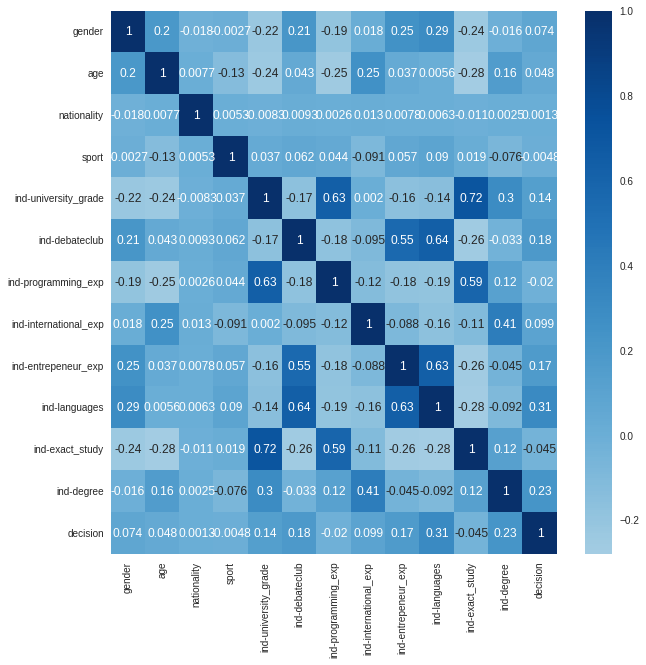

In [75]:
matrix = rec_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot =True, cmap = "Blues", center=0)

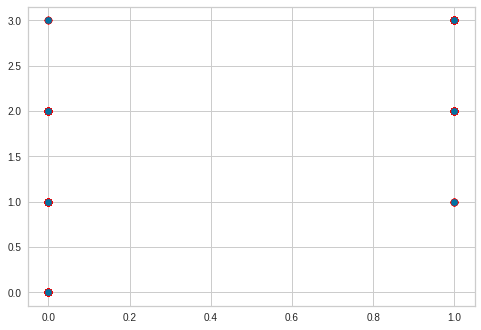

In [76]:
plt.scatter(x = rec_dataset['ind-debateclub'], y = rec_dataset['ind-languages'], edgecolors= 'red')

# Indicators

In [77]:
from itertools import combinations
indicators = company_A[["ind-university_grade", "ind-debateclub" , "ind-programming_exp", "ind-international_exp",
                        "ind-entrepeneur_exp", "ind-languages", "ind-exact_study", "ind-degree"]]#filetring 8 indicators
indicators = indicators.astype(int) 



In [78]:
#four_indicators = company_A[["ind-international_exp", "ind-languages", "ind-programming_exp", "ind-university_grade",]]
four_indicators_1 = company_A[["ind-entrepeneur_exp", "ind-international_exp", "ind-programming_exp", "ind-university_grade","Id"]]
four_indicators_2 = company_A[["ind-entrepeneur_exp", "ind-degree", "ind-exact_study", "ind-university_grade","Id"]]
four_indicators_3 = company_A[["ind-entrepeneur_exp", "ind-debateclub", "ind-languages", "ind-university_grade","Id"]]
four_indicators = [four_indicators_1,four_indicators_2,four_indicators_3] #choosing three different models with four indicators



#normalize(four_indicators)

# Cluster

In [79]:
# clusters = sch.linkage(indicators, method = 'ward', metric = "euclidean")
# plt.figure(figsize=(10,8))
# sch.dendrogram (clusters, above_threshold_color = "green", color_threshold = 7)
# plt.axhline(y = 125, color = 'r', linestyle = '--')
# plt.title("Dendrogram")
#creating a dendrogram to figure out the number of clusters needed

In [80]:
clustering_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward' )
hc= clustering_model.fit_predict(indicators)
for ele in four_indicators:
  ele['cluster'] = pd.DataFrame(hc)
  #adding cluster number to the dataset for each value/decision


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Model 

In [81]:
def compare_model(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state = 40)
  print("random state: 40")
  print("test_size: 0.3")
  clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 40, max_depth = X.columns.size , min_samples_leaf = 6)
  clf_entropy.fit(X_train, y_train)
  y_pred_en = clf_entropy.predict(X_test)
  print(("Accuracy is"), accuracy_score(y_test,y_pred_en)*100)
  print(classification_report(y_test, y_pred_en))
  return accuracy_score(y_test,y_pred_en)*100,clf_entropy,X_train, X_test, y_train, y_test
  #a function to make and print out different features of the model
  

In [82]:
#here we compare three models with four indicators and also with three and five indicators
accuracy = 0
model = 0
x = 0
y = 0
X_train, X_test, y_train, y_test = 0,0,0,0
index1 = 0
max = 0
for ele in four_indicators:
  print("model with four indicators:")
  print(ele.columns.values)
  X = ele.drop("Id",axis=1)
  Y = company_A["decision"]
  accu = compare_model(X,Y)
  if accuracy < accu[0]:
    accuracy = accu[0]
    model = accu[1]
    X_train = accu[2]
    X_test  = accu[3]
    y_train = accu[4]
    y_test = accu[5]
    y_pred_en = model.predict(X_test)
    max = index1  
    x = ele
    y = Y 
  index1 += 1


three_indix = four_indicators[max].drop("ind-languages",axis = 1)
five_indix = four_indicators[max].join(company_A["ind-degree"])
Y = company_A["decision"]
print("three indicators :")
print(three_indix.columns.values)
accu = compare_model(three_indix.drop("Id",axis=1),Y)
print("five indicators :")
print(five_indix.columns.values)
accu = compare_model(five_indix.drop("Id",1),Y)






model with four indicators:
['ind-entrepeneur_exp' 'ind-international_exp' 'ind-programming_exp'
 'ind-university_grade' 'Id' 'cluster']
random state: 40
test_size: 0.3
Accuracy is 64.66666666666666
              precision    recall  f1-score   support

       False       0.64      0.88      0.74       171
        True       0.68      0.34      0.45       129

    accuracy                           0.65       300
   macro avg       0.66      0.61      0.60       300
weighted avg       0.65      0.65      0.62       300

model with four indicators:
['ind-entrepeneur_exp' 'ind-degree' 'ind-exact_study'
 'ind-university_grade' 'Id' 'cluster']
random state: 40
test_size: 0.3
Accuracy is 64.66666666666666
              precision    recall  f1-score   support

       False       0.72      0.61      0.66       171
        True       0.57      0.69      0.63       129

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



# Confusion Matrix and Classification

[[139  32]
 [ 58  71]]


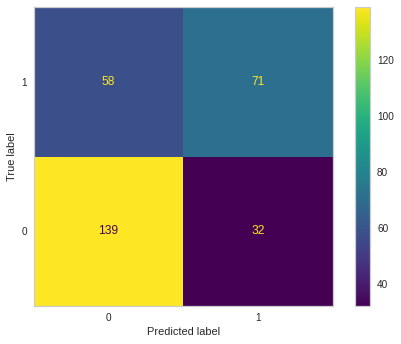

In [83]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
print(confusion_matrix(y_test,y_pred_en))
cm = confusion_matrix(y_test, y_pred_en)

ConfusionMatrixDisplay(cm).plot()
plt.gca().invert_yaxis()
plt.grid(False)
plt.show()
#confusion matrix of the best model with four indicators


In [84]:
print(f1_score(y_test, y_pred_en, average ='weighted'))
print(f1_score(y_test, y_pred_en, average ='micro'))
print(f1_score(y_test, y_pred_en, average ='macro'))
print(f1_score(y_test, y_pred_en, average =None))

0.6937874812593702
0.7
0.6837518740629684
[0.75543478 0.61206897]


In [85]:
print(classification_report(y_test, y_pred_en))
#analysis of the best model with four indicators

              precision    recall  f1-score   support

       False       0.71      0.81      0.76       171
        True       0.69      0.55      0.61       129

    accuracy                           0.70       300
   macro avg       0.70      0.68      0.68       300
weighted avg       0.70      0.70      0.69       300



# Plottings

In [86]:
fpr, tpr , _ = metrics.roc_curve(y_test, y_pred_en)


In [87]:
y_scores = model.predict_proba(X)
y_onehot = pd.get_dummies(Y, columns=model.classes_)

fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_scores.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_scores[:, i]

    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)

    name = f"{y_onehot.columns[i]} (AUC={auc_score:.2f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Ratio',
    yaxis_title='True Positive Ratio',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()
#plotting AUC curve

['ind-entrepeneur_exp' 'ind-debateclub' 'ind-languages'
 'ind-university_grade' 'cluster']


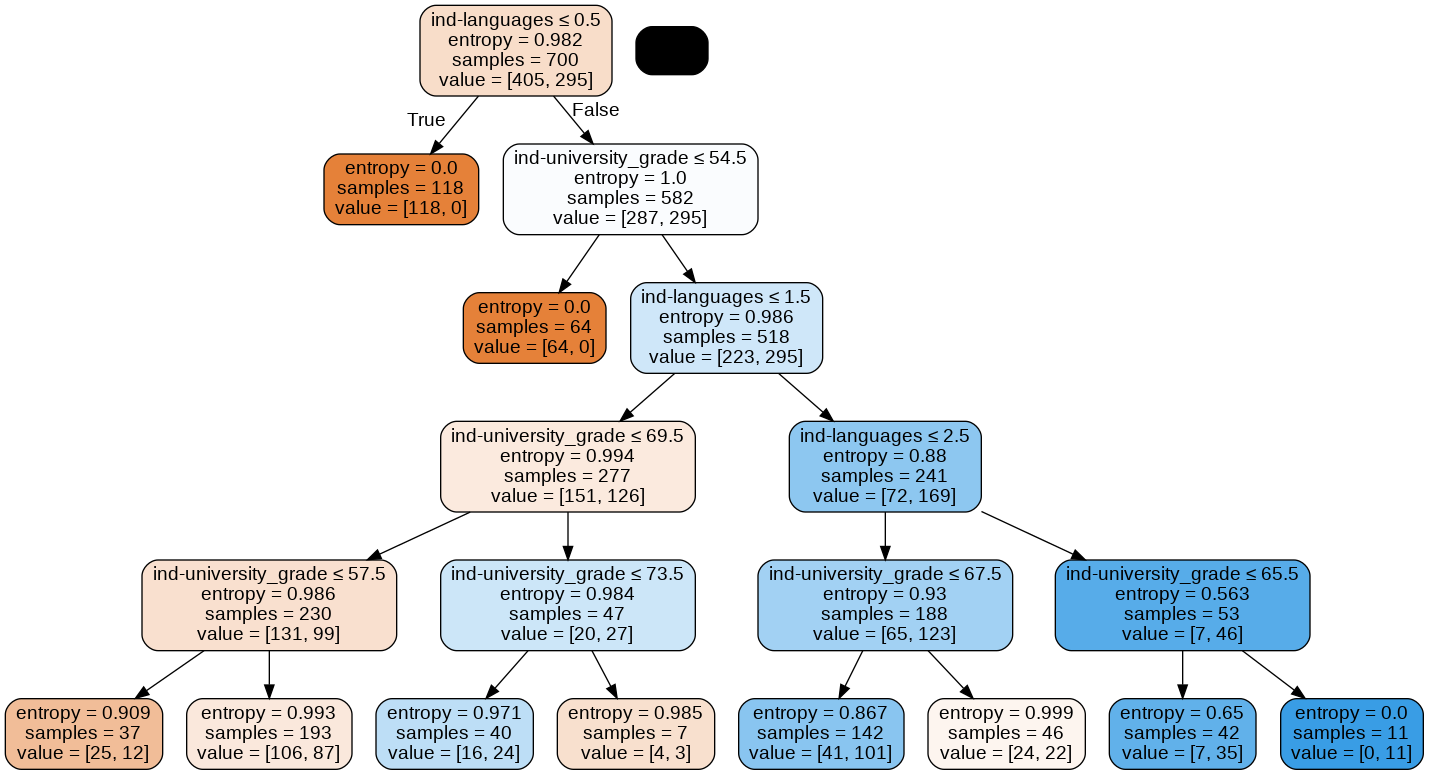

In [88]:
import six as sx
from IPython.display import Image   
from sklearn.tree import export_graphviz
import pydotplus
feature_cols = np.array(x.columns.values)
np.where(feature_cols == "Id")
feature_cols = np.delete(feature_cols,np.where(feature_cols == "Id"))
print(feature_cols)
dot_data = sx.StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
#plotting decision tree

In [89]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = cross_val_score(model,x.drop("Id",axis = 1),y,cv = 10)*100
print(cv_scores)
print(np.mean(cv_scores))



[66. 68. 72. 75. 75. 79. 67. 64. 71. 70.]
70.7
